# Blueberry phenotypic correlations 

### import data and libraries

In [143]:
#read in phenotypic data spreadsheet
setwd("G:\\My Drive\\research\\Diversity Panel\\2019_Pheno\\CS590_project")
pheno = read.csv('12.4.2019_SANDHILLS+CORVALIS_16(har2)and134remove_AVG.csv', header=TRUE)

In [144]:
#load libraries for graphics

library(ggplot2)
library(dplyr)
library(corrplot)
library(corrgram)
library(tidyr)

In [145]:
#view pheno data
head(pheno, 10)

SAMPLE_ID.REP.HARVEST,sample_id,rep,sample.indiv_har,id.rep,REAL_NAME,FM_PARENT,M_PARENT,DATE,SEASON.HARVEST,...,Autotitration_VEQ1..mL.,Autotitration_EST..pH.,BREAK.POINT,Absolute.Positive.Force..g.,Distance.At.Positive.Force..mm.,Absolute.Positive.Distance..mm.,Peak.Force..g.,Positive.Area..g.sec.,Area.To.Absolute.Positive.Force..g.sec.,Force.at.Target..g.
PI618164-2-1,PI618164,2,PI618164-1,PI618164-2,Legacy-2,Elisabeth,US75,8-Jul,1,...,1.993,2.564,411.7287,411.7353,6.0360,13.0974,411.7353,986.2776,613.5466,370.2963
PI618164-1-1,PI618164,1,PI618164-1,PI618164-1,Legacy-1,Elisabeth,US75,8-Jul,1,...,2.884,2.413,472.2629,472.2703,6.8910,12.2072,472.1677,1136.5422,826.8439,402.8701
PI554820-2-1,PI554820,2,PI554820-1,PI554820-2,Stanley-2,Katharine,Rubel,8-Jul,1,...,1.324,3.310,379.1042,379.1103,6.2732,10.9705,379.1103,1201.9616,795.9394,323.4575
PI554820-1-1,PI554820,1,PI554820-1,PI554820-1,Stanley-1,Katharine,Rubel,8-Jul,1,...,1.031,3.402,280.0487,280.0530,5.9591,11.8971,280.0530,950.2285,559.8686,238.6548
PI554879-1-1,PI554879,1,PI554879-1,PI554879-1,Reveille-1,NC1171,NCSF-12-L,8-Jul,1,...,1.946,2.595,486.4019,486.4097,5.8530,8.7807,483.2358,1189.2806,727.2573,452.0568
PI554879-2-1,PI554879,2,PI554879-1,PI554879-2,Reveille-2,NC1171,NCSF-12-L,8-Jul,1,...,1.693,2.712,497.4296,497.4374,5.3755,10.2017,495.7307,1202.4997,631.5241,456.2936
PI554859-2-1,PI554859,2,PI554859-1,PI554859-2,Bounty-2,Murphy,G125,8-Jul,1,...,1.967,2.606,273.1689,273.1732,7.4670,12.3849,273.1732,1064.5615,711.7461,200.4231
PI554793-2-1,PI554793,2,PI554793-1,PI554793-2,V. corymbosum DE644-2,0,0,8-Jul,1,...,2.361,2.421,243.8884,243.8921,6.1049,6.5651,234.9428,616.0145,541.5882,196.2208
PI554808-1-1,PI554808,1,PI554808-1,PI554808-1,Jersey-1,Rubel,Grover,8-Jul,1,...,2.487,2.534,291.9782,291.9828,5.7801,11.9524,291.9828,1060.1757,628.6203,260.5364
PI554883-1-1,PI554883,1,PI554883-1,PI554883-1,Berkeley-1,Stanley,GS149,8-Jul,1,...,1.701,2.655,331.1627,331.1680,8.3055,13.1254,331.1680,877.9548,688.8131,250.7707


In [146]:
#read in flowering data
flower = read.csv('Fowering_date+Fruit_Ripening_DAYSCALC.csv', header=TRUE)

In [147]:
#view flowering and fruiting data
head(flower, 10)

REAL_NAME,ID,REP,bud.break,full.bloom,first.blue,last.blue,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE
NC3048-1,NC3048,1,3/1/2019,4/5/2019,5/24/2019,6/24/2019,35,49,80,31,84,115
NC3048-2,NC3048,2,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC3048-3,NC3048,3,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC3883-1,NC3883,1,3/1/2019,3/29/2019,5/17/2019,6/24/2019,28,49,87,38,77,115
NC3883-2,NC3883,2,3/1/2019,4/5/2019,5/17/2019,7/6/2019,35,42,92,50,77,127
NC3883-3,NC3883,3,3/1/2019,3/29/2019,5/17/2019,7/6/2019,28,49,99,50,77,127
NC80-2-14-1,NC80-2-14,1,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC80-2-14-2,NC80-2-14,2,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC80-2-14-3,NC80-2-14,3,3/1/2019,3/29/2019,5/24/2019,6/24/2019,28,56,87,31,84,115
NC4511-1,NC4511,1,3/1/2019,4/5/2019,5/31/2019,7/16/2019,35,56,102,46,91,137


In [148]:
#edit 'flowering' datasheet to drop all of unneccessary columns (extra columns containing NA were added)
flower<-subset.data.frame(flower, select= -c(0,15:25))

In [149]:
#check to make sure the columns were dropped
head(flower, 10)

REAL_NAME,ID,REP,bud.break,full.bloom,first.blue,last.blue,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE
NC3048-1,NC3048,1,3/1/2019,4/5/2019,5/24/2019,6/24/2019,35,49,80,31,84,115
NC3048-2,NC3048,2,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC3048-3,NC3048,3,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC3883-1,NC3883,1,3/1/2019,3/29/2019,5/17/2019,6/24/2019,28,49,87,38,77,115
NC3883-2,NC3883,2,3/1/2019,4/5/2019,5/17/2019,7/6/2019,35,42,92,50,77,127
NC3883-3,NC3883,3,3/1/2019,3/29/2019,5/17/2019,7/6/2019,28,49,99,50,77,127
NC80-2-14-1,NC80-2-14,1,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC80-2-14-2,NC80-2-14,2,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC80-2-14-3,NC80-2-14,3,3/1/2019,3/29/2019,5/24/2019,6/24/2019,28,56,87,31,84,115
NC4511-1,NC4511,1,3/1/2019,4/5/2019,5/31/2019,7/16/2019,35,56,102,46,91,137


In [150]:
#remove columns accession.ID and REP as they will be redundant upon the merge
flower<-subset.data.frame(flower, select= -c(0, 2:3))

In [151]:
#check to make sure the columns were dropped
head(flower, 10)

REAL_NAME,bud.break,full.bloom,first.blue,last.blue,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE
NC3048-1,3/1/2019,4/5/2019,5/24/2019,6/24/2019,35,49,80,31,84,115
NC3048-2,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC3048-3,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC3883-1,3/1/2019,3/29/2019,5/17/2019,6/24/2019,28,49,87,38,77,115
NC3883-2,3/1/2019,4/5/2019,5/17/2019,7/6/2019,35,42,92,50,77,127
NC3883-3,3/1/2019,3/29/2019,5/17/2019,7/6/2019,28,49,99,50,77,127
NC80-2-14-1,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC80-2-14-2,3/1/2019,3/29/2019,5/24/2019,7/6/2019,28,56,99,43,84,127
NC80-2-14-3,3/1/2019,3/29/2019,5/24/2019,6/24/2019,28,56,87,31,84,115
NC4511-1,3/1/2019,4/5/2019,5/31/2019,7/16/2019,35,56,102,46,91,137


# Merge data and manipulate traits to be numeric

In [152]:
#right merge flowering data onto phenotypic data
BBdiversity<-merge(pheno,flower, by.x='REAL_NAME',by.y='REAL_NAME',all.x=TRUE)

In [153]:
#check the merge
head(BBdiversity, 20)

REAL_NAME,SAMPLE_ID.REP.HARVEST,sample_id,rep,sample.indiv_har,id.rep,FM_PARENT,M_PARENT,DATE,SEASON.HARVEST,...,bud.break,full.bloom,first.blue,last.blue,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE
#N/A,PI554836-2-1,PI554836,2,PI554836-1,PI554836-2,#N/A,#N/A,8-Jul,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
#N/A,PI554836-1-1,PI554836,1,PI554836-1,PI554836-1,#N/A,#N/A,8-Jul,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
#N/A,PI554836-1-2,PI554836,1,PI554836-2,PI554836-1,#N/A,#N/A,15-Jul,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
#N/A,PI554836-2-2,PI554836,2,PI554836-2,PI554836-2,#N/A,#N/A,15-Jul,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
#N/A,PI618147-1-2,PI618147,1,PI618147-1,PI618147-1,#N/A,#N/A,15-Jul,2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
#N/A,PI618147-1-4,PI618147,1,PI618147-2,PI618147-1,#N/A,#N/A,29-Jul,4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARLEN-1,86-1-5,86,1,86-2,86-1,G-144,FL 4-76,12-Jun,5,...,3/15/2019,3/29/2019,5/31/2019,7/16/2019,14,63,109,46,77,123
ARLEN-1,86-1-4,86,1,86-1,86-1,G-144,FL 4-76,4-Jun,4,...,3/15/2019,3/29/2019,5/31/2019,7/16/2019,14,63,109,46,77,123
ARLEN-1,86-1-6,86,1,86-3,86-1,G-144,FL 4-76,18-Jun,6,...,3/15/2019,3/29/2019,5/31/2019,7/16/2019,14,63,109,46,77,123
ARLEN-2,86-2-4,86,2,86-1,86-2,G-144,FL 4-76,4-Jun,4,...,3/15/2019,3/29/2019,5/24/2019,7/16/2019,14,56,109,53,70,123


In [154]:
#determine the structure, rows, and columns within the 
str(BBdiversity)

'data.frame':	1533 obs. of  45 variables:
 $ REAL_NAME                              : Factor w/ 540 levels "#N/A","ARLEN-1",..: 1 1 1 1 1 1 2 2 2 3 ...
 $ SAMPLE_ID.REP.HARVEST                  : Factor w/ 1525 levels "1-1-5","1-1-6",..: 1349 1347 1348 1350 1450 1451 1121 1120 1122 1123 ...
 $ sample_id                              : Factor w/ 225 levels "1","10","100",..: 177 177 177 177 205 205 135 135 135 135 ...
 $ rep                                    : num  2 1 1 2 1 1 1 1 1 2 ...
 $ sample.indiv_har                       : Factor w/ 619 levels "1-1","1-2","1-3",..: 520 520 521 521 576 577 422 421 423 421 ...
 $ id.rep                                 : Factor w/ 554 levels "1-1","10-1","10-2",..: 465 464 464 465 516 516 373 373 373 374 ...
 $ FM_PARENT                              : Factor w/ 156 levels "#N/A","0","290-1",..: 1 1 1 1 1 1 41 41 41 41 ...
 $ M_PARENT                               : Factor w/ 147 levels " Avonblue"," Carteret",..: 26 26 26 26 26 26 50 50 50 50 ...


In [155]:
#change factors to numeric

BBdiversity$BRIX<-as.numeric(BBdiversity$BRIX)
BBdiversity$ACIDITY<-as.numeric(BBdiversity$ACIDITY)
BBdiversity$AutoTitrator_Sample_size..g.<-as.numeric(BBdiversity$AutoTitrator_Sample_size..g.)

In [156]:
#replace all black spaces with NA
BBdiversity[BBdiversity == ""] <- NA

In [157]:
#check the structure to see if the blank spaces were appropriately substituted
str(BBdiversity)

'data.frame':	1533 obs. of  45 variables:
 $ REAL_NAME                              : Factor w/ 540 levels "#N/A","ARLEN-1",..: 1 1 1 1 1 1 2 2 2 3 ...
 $ SAMPLE_ID.REP.HARVEST                  : Factor w/ 1525 levels "1-1-5","1-1-6",..: 1349 1347 1348 1350 1450 1451 1121 1120 1122 1123 ...
 $ sample_id                              : Factor w/ 225 levels "1","10","100",..: 177 177 177 177 205 205 135 135 135 135 ...
 $ rep                                    : num  2 1 1 2 1 1 1 1 1 2 ...
 $ sample.indiv_har                       : Factor w/ 619 levels "1-1","1-2","1-3",..: 520 520 521 521 576 577 422 421 423 421 ...
 $ id.rep                                 : Factor w/ 554 levels "1-1","10-1","10-2",..: 465 464 464 465 516 516 373 373 373 374 ...
 $ FM_PARENT                              : Factor w/ 156 levels "#N/A","0","290-1",..: 1 1 1 1 1 1 41 41 41 41 ...
 $ M_PARENT                               : Factor w/ 147 levels " Avonblue"," Carteret",..: 26 26 26 26 26 26 50 50 50 50 ...


In [158]:
#change the location indicator from Cv (corvalis) to 1 and SH (sandhills_) to 2
BBdiversity$LOCATION <- gsub("CV", 1,BBdiversity$LOCATION)
BBdiversity$LOCATION <- gsub("SH", 2,BBdiversity$LOCATION)

In [159]:
#change the location to numeric for correlation purporses
BBdiversity$LOCATION <-as.numeric(BBdiversity$LOCATION)

In [160]:
#identify as.Date for the flowering time data
BBdiversity$bud.break<-as.Date(as.character(BBdiversity$bud.break), format="%m/%d/%Y")
BBdiversity$full.bloom<-as.Date(as.character(BBdiversity$full.bloom), format="%m/%d/%Y")
BBdiversity$first.blue<-as.Date(as.character(BBdiversity$first.blue), format="%m/%d/%Y")
BBdiversity$last.blue<-as.Date(as.character(BBdiversity$last.blue), format="%m/%d/%Y")

In [161]:
#format the flowering time data to julian dates for correlation purposes
BBdiversity$bud.breakJ<-format(BBdiversity$bud.break,"%j")
BBdiversity$full.bloomJ<-format(BBdiversity$bud.break,"%j")
BBdiversity$first.blueJ<-format(BBdiversity$first.blue,"%j")
BBdiversity$last.blueJ<-format(BBdiversity$last.blue,"%j")

In [162]:
#make sure the julian dates are numeric
BBdiversity$bud.breakJ<-as.numeric(BBdiversity$bud.breakJ)
BBdiversity$full.bloomJ<-as.numeric(BBdiversity$bud.breakJ)
BBdiversity$first.blueJ<-as.numeric(BBdiversity$first.blueJ)
BBdiversity$last.blueJ<-as.numeric(BBdiversity$last.blueJ)

In [163]:
#check structure to ensure changes and additions of julain dates and that they are numeric
str(BBdiversity)

'data.frame':	1533 obs. of  49 variables:
 $ REAL_NAME                              : Factor w/ 540 levels "#N/A","ARLEN-1",..: 1 1 1 1 1 1 2 2 2 3 ...
 $ SAMPLE_ID.REP.HARVEST                  : Factor w/ 1525 levels "1-1-5","1-1-6",..: 1349 1347 1348 1350 1450 1451 1121 1120 1122 1123 ...
 $ sample_id                              : Factor w/ 225 levels "1","10","100",..: 177 177 177 177 205 205 135 135 135 135 ...
 $ rep                                    : num  2 1 1 2 1 1 1 1 1 2 ...
 $ sample.indiv_har                       : Factor w/ 619 levels "1-1","1-2","1-3",..: 520 520 521 521 576 577 422 421 423 421 ...
 $ id.rep                                 : Factor w/ 554 levels "1-1","10-1","10-2",..: 465 464 464 465 516 516 373 373 373 374 ...
 $ FM_PARENT                              : Factor w/ 156 levels "#N/A","0","290-1",..: 1 1 1 1 1 1 41 41 41 41 ...
 $ M_PARENT                               : Factor w/ 147 levels " Avonblue"," Carteret",..: 26 26 26 26 26 26 50 50 50 50 ...


# Create a new dataframe with averaged traits across harvests per sample-rep

In [223]:
#Develop a new dataframe for accession averages
BBagg <- BBdiversity[,c(11:35, 40:49)] %>% 
        aggregate(by = list(sample.indiv_har=BBdiversity$sample.indiv_har),
                   FUN= mean, na.rm=TRUE)

In [224]:
#check column names since we did not want to include the as.Date in the new data.frame

colnames(BBagg)

[1] "sample.indiv_har"                       
 [2] "INDIV..HARVEST"                         
 [3] "LOCATION"                               
 [4] "WEIGHT"                                 
 [5] "LONGITUDE"                              
 [6] "LATITUDE"                               
 [7] "L..D65."                                
 [8] "a..D65."                                
 [9] "b..D65."                                
[10] "BRIX"                                   
[11] "ACIDITY"                                
[12] "r"                                      
[13] "FIRMNESS"                               
[14] "hue.angle"                              
[15] "chroma"                                 
[16] "AutoTitrator_Sample_size..g."           
[17] "Autotitration_VEQ1..mL."                
[18] "Autotitration_EST..pH."                 
[19] "BREAK.POINT"                            
[20] "Absolute.Positive.Force..g."            
[21] "Distance.At.Positive.Force..mm."        
[22] "Absolute.Positive.Distance..mm."        
[23] "Peak.Force..g."                         
[24] "Positive.Area..g.sec."                  
[25] "Area.To.Absolute.Positive.Force..g.sec."
[26] "Force.at.Target..g."                    
[27] "BB.2.FB"                                
[28] "FB.2.FIRSTBLUE"                         
[29] "FB.2.LASTBLUE"                          
[30] "FIRSTBLUE.2.LASTBLUE"                   
[31] "BB.2.FIRSTBLUE"                         
[32] "BB.2.LASTBLUE"                          
[33] "bud.breakJ"                             
[34] "full.bloomJ"                            
[35] "first.blueJ"                            
[36] "last.blueJ"

In [225]:
#check out the new data frame, make sure sample_harvest is averaged
head(BBagg, 20)

sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ
1-1,1,2,1.0445000,10.358000,12.584000,33.33000,0.09000000,-4.080000,38.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-2,2,2,0.7854444,9.522000,11.606000,30.58000,0.18000000,-3.860000,52.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-3,3,2,0.5458000,8.838000,9.688000,31.72000,-0.09000000,-4.470000,58.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
10-3,3,2,0.3693000,6.930333,8.033333,24.98000,-0.36000000,-3.110000,112.33333,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
100-1,1,2,1.0253667,9.358333,12.195667,31.76667,-0.58333333,-5.023333,42.00000,...,25.66667,58.33333,111.3333,53,84,137,60,60,144,197
100-2,2,2,1.0391000,10.237000,11.594667,31.93667,-0.62666667,-5.083333,56.33333,...,25.66667,58.33333,111.3333,53,84,137,60,60,144,197
100-3,3,2,1.1259000,10.718000,12.763667,32.29000,-0.56333333,-3.963333,36.00000,...,25.66667,58.33333,111.3333,53,84,137,60,60,144,197
102-1,1,2,0.9107500,9.730500,11.226500,29.60500,-0.43500000,-5.215000,48.00000,...,28.00000,49.00000,92.0000,43,77,120,67,67,144,187


In [226]:
#grab the names and parents from original dataframe
colnames(BBdiversity)

[1] "REAL_NAME"                              
 [2] "SAMPLE_ID.REP.HARVEST"                  
 [3] "sample_id"                              
 [4] "rep"                                    
 [5] "sample.indiv_har"                       
 [6] "id.rep"                                 
 [7] "FM_PARENT"                              
 [8] "M_PARENT"                               
 [9] "DATE"                                   
[10] "SEASON.HARVEST"                         
[11] "INDIV..HARVEST"                         
[12] "LOCATION"                               
[13] "WEIGHT"                                 
[14] "LONGITUDE"                              
[15] "LATITUDE"                               
[16] "L..D65."                                
[17] "a..D65."                                
[18] "b..D65."                                
[19] "BRIX"                                   
[20] "ACIDITY"                                
[21] "r"                                      
[22] "FIRMNESS"                               
[23] "hue.angle"                              
[24] "chroma"                                 
[25] "AutoTitrator_Sample_size..g."           
[26] "Autotitration_VEQ1..mL."                
[27] "Autotitration_EST..pH."                 
[28] "BREAK.POINT"                            
[29] "Absolute.Positive.Force..g."            
[30] "Distance.At.Positive.Force..mm."        
[31] "Absolute.Positive.Distance..mm."        
[32] "Peak.Force..g."                         
[33] "Positive.Area..g.sec."                  
[34] "Area.To.Absolute.Positive.Force..g.sec."
[35] "Force.at.Target..g."                    
[36] "bud.break"                              
[37] "full.bloom"                             
[38] "first.blue"                             
[39] "last.blue"                              
[40] "BB.2.FB"                                
[41] "FB.2.FIRSTBLUE"                         
[42] "FB.2.LASTBLUE"                          
[43] "FIRSTBLUE.2.LASTBLUE"                   
[44] "BB.2.FIRSTBLUE"                         
[45] "BB.2.LASTBLUE"                          
[46] "bud.breakJ"                             
[47] "full.bloomJ"                            
[48] "first.blueJ"                            
[49] "last.blueJ"

In [227]:
#we want to add back in the parents for each of the accessions, therefore develop a new dataframe
flowers2<-select(BBdiversity, sample.indiv_har, REAL_NAME, FM_PARENT, M_PARENT)

In [228]:
#we will merge on an aggregated dataframe. the origianl flowering data does not have ' harvests' therefore we order the dataframe to see if there are replicates
flowers2<-flowers2[order(flowers2$sample.indiv_har),]
head(flowers2, 20)

,sample.indiv_har,REAL_NAME,FM_PARENT,M_PARENT
1026,1-1,NC4728,NC 3219,Spartan
1027,1-2,NC4728,NC 3219,Spartan
1028,1-3,NC4728,NC 3219,Spartan
456,10-1,NC3530-1,NC80-8-1,NC945
460,10-1,NC3530-2,NC80-8-1,NC945
463,10-1,NC3530-3,NC80-8-1,NC945
458,10-2,NC3530-1,NC80-8-1,NC945
461,10-2,NC3530-2,NC80-8-1,NC945
464,10-2,NC3530-3,NC80-8-1,NC945
457,10-3,NC3530-1,NC80-8-1,NC945


In [229]:
#remove replicates
uniqflowers2<-unique(flowers2)

In [230]:
#right merge flowering data onto phenotypic data
BBavg<-merge(BBagg,uniqflowers2, by.x='sample.indiv_har',by.y='sample.indiv_har',all.x=TRUE)

In [231]:
BBavg

sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
1-1,1,2,1.0445000,10.358000,12.584000,33.33000,0.09000000,-4.080000,38.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC4728,NC 3219,Spartan
1-2,2,2,0.7854444,9.522000,11.606000,30.58000,0.18000000,-3.860000,52.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC4728,NC 3219,Spartan
1-3,3,2,0.5458000,8.838000,9.688000,31.72000,-0.09000000,-4.470000,58.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NC4728,NC 3219,Spartan
10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,...,25,77,102,60,60,137,162,NC3530-1,NC80-8-1,NC945
10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,...,25,77,102,60,60,137,162,NC3530-2,NC80-8-1,NC945
10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,...,25,77,102,60,60,137,162,NC3530-3,NC80-8-1,NC945
10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,...,25,77,102,60,60,137,162,NC3530-1,NC80-8-1,NC945
10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,...,25,77,102,60,60,137,162,NC3530-2,NC80-8-1,NC945
10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,...,25,77,102,60,60,137,162,NC3530-3,NC80-8-1,NC945
10-3,3,2,0.3693000,6.930333,8.033333,24.98000,-0.36000000,-3.110000,112.33333,...,25,77,102,60,60,137,162,NC3530-1,NC80-8-1,NC945


In [232]:
str(BBavg)

'data.frame':	1503 obs. of  39 variables:
 $ sample.indiv_har                       : Factor w/ 619 levels "1-1","1-2","1-3",..: 1 2 3 4 4 4 5 5 5 6 ...
 $ INDIV..HARVEST                         : num  1 2 3 1 1 1 2 2 2 3 ...
 $ LOCATION                               : num  2 2 2 2 2 2 2 2 2 2 ...
 $ WEIGHT                                 : num  1.044 0.785 0.546 0.666 0.666 ...
 $ LONGITUDE                              : num  10.36 9.52 8.84 8.63 8.63 ...
 $ LATITUDE                               : num  12.58 11.61 9.69 10.43 10.43 ...
 $ L..D65.                                : num  33.3 30.6 31.7 23.1 23.1 ...
 $ a..D65.                                : num  0.09 0.18 -0.09 -0.34 -0.34 -0.34 -0.34 -0.34 -0.34 -0.36 ...
 $ b..D65.                                : num  -4.08 -3.86 -4.47 -3.44 -3.44 ...
 $ BRIX                                   : num  38 52 58 46.3 46.3 ...
 $ ACIDITY                                : num  63 64 157 44.7 44.7 ...
 $ r                                    

# But that location is pretty different...we should see if that is significant... and  then maybe analyze the data separately

In [233]:
#check for variance explanation in location, individual harvest and replicate
#note we do not expect hardly any variation in replicates
#we expect some variation in individual harvests as fruit ripening progresses
#we expect location to have a lot of variation in the data and will analyze the data separately if so
model<-lm(FIRMNESS~LOCATION+INDIV..HARVEST+rep, data=BBdiversity)
summary(model)


Call:
lm(formula = FIRMNESS ~ LOCATION + INDIV..HARVEST + rep, data = BBdiversity)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.886 -21.974  -2.266  18.888 127.089 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    129.7389     4.0364  32.142   <2e-16 ***
LOCATION        22.1043     2.1780  10.149   <2e-16 ***
INDIV..HARVEST   1.4713     0.9142   1.609    0.108    
rep              0.6620     0.8830   0.750    0.454    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.61 on 1510 degrees of freedom
  (19 observations deleted due to missingness)
Multiple R-squared:  0.07944,	Adjusted R-squared:  0.07761 
F-statistic: 43.43 on 3 and 1510 DF,  p-value: < 2.2e-16


In [234]:
#since there are significant differences between locations we will look at these locaitons separately, two new dataframes for each location are create
BBavg_CV <- BBavg[which(BBavg$LOCATION == 1),]
BBavg_SH <- BBavg[which(BBavg$LOCATION == 2),]
#drop location from dataframes
BBavg_CV<-subset(BBavg_CV, select = -c(LOCATION))
BBavg_SH<-subset(BBavg_SH, select = -c(LOCATION))

In [235]:
#check structure to make certain that location has been removed
str(BBavg_SH)

'data.frame':	1237 obs. of  38 variables:
 $ sample.indiv_har                       : Factor w/ 619 levels "1-1","1-2","1-3",..: 1 2 3 4 4 4 5 5 5 6 ...
 $ INDIV..HARVEST                         : num  1 2 3 1 1 1 2 2 2 3 ...
 $ WEIGHT                                 : num  1.044 0.785 0.546 0.666 0.666 ...
 $ LONGITUDE                              : num  10.36 9.52 8.84 8.63 8.63 ...
 $ LATITUDE                               : num  12.58 11.61 9.69 10.43 10.43 ...
 $ L..D65.                                : num  33.3 30.6 31.7 23.1 23.1 ...
 $ a..D65.                                : num  0.09 0.18 -0.09 -0.34 -0.34 -0.34 -0.34 -0.34 -0.34 -0.36 ...
 $ b..D65.                                : num  -4.08 -3.86 -4.47 -3.44 -3.44 ...
 $ BRIX                                   : num  38 52 58 46.3 46.3 ...
 $ ACIDITY                                : num  63 64 157 44.7 44.7 ...
 $ r                                      : num  19.29 20.99 9.34 28.12 28.12 ...
 $ FIRMNESS                    

# Look at points of interest to keep the advisor happy

In [236]:
#report the top 10 firmest accessions in each location
BBavg[order(BBavg$FIRMNESS),][1:10,]

,sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
1429,PI618147-2,2,1,0.2395714,5.367143,6.7400,22.770,0.220,-2.680,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#N/A,#N/A,#N/A
1369,PI554860-2,2,1,2.3789500,12.038500,16.5605,30.790,-0.410,-4.020,63.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bluechip-1,Croatan,US11-93
1370,PI554860-2,2,1,2.3789500,12.038500,16.5605,30.790,-0.410,-4.020,63.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bluechip-2,Croatan,US11-93
1401,PI554942-2,2,1,2.5378500,12.056000,17.0220,25.260,-0.150,-2.725,22.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northblue-1,B10,US3
1402,PI554942-2,2,1,2.5378500,12.056000,17.0220,25.260,-0.150,-2.725,22.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northblue-2,B10,US3
144,114-2,2,2,0.3276500,7.859000,7.2770,26.160,-0.075,-1.765,66.0,...,33,55,88,74,74,129,162,NC4307-1,NC 2845,NC 2860
145,114-2,2,2,0.3276500,7.859000,7.2770,26.160,-0.075,-1.765,66.0,...,33,55,88,74,74,129,162,NC4307-2,NC 2845,NC 2860
1271,PI554805-2,2,1,2.0434500,10.590000,16.7495,26.585,-0.260,-3.045,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Herbert -1,Stanley,GS149
1272,PI554805-2,2,1,2.0434500,10.590000,16.7495,26.585,-0.260,-3.045,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Herbert -2,Stanley,GS149
1314,PI554826-1,1,1,1.2245000,10.625000,12.9495,24.965,-0.325,-3.445,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cabot -1,Brooks,Chatsworth


In [237]:
#report the top 10 earliest blueberries to break bud
BBavg[order(-BBavg$bud.breakJ),][1:10,]

,sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
592,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
593,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620
594,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-3,G180,MU6620
595,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-4,G180,MU6620
596,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
597,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620
598,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-3,G180,MU6620
599,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-4,G180,MU6620
600,28-3,3,2,0.986400,9.51275,12.25475,29.9625,-0.2425,-3.6275,38.5,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
601,28-3,3,2,0.986400,9.51275,12.25475,29.9625,-0.2425,-3.6275,38.5,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620


In [238]:
#report the top 10 lastest blueberries to beak bud
BBavg[order(-BBavg$full.bloomJ),][1:10,]

,sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
592,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
593,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620
594,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-3,G180,MU6620
595,28-1,1,2,0.975700,9.75050,13.73175,29.8350,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-4,G180,MU6620
596,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
597,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620
598,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-3,G180,MU6620
599,28-2,2,2,0.975125,9.30300,11.69650,30.9075,-0.4300,-4.2875,49.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-4,G180,MU6620
600,28-3,3,2,0.986400,9.51275,12.25475,29.9625,-0.2425,-3.6275,38.5,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
601,28-3,3,2,0.986400,9.51275,12.25475,29.9625,-0.2425,-3.6275,38.5,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620


In [239]:
#report the top 10 earliest blueberries to reach full bloom
BBavg[order(BBavg$full.bloomJ),][1:10,]

,sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
4,10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.3400000,-3.440000,46.33333,...,25,77,102,60,60,137,162,NC3530-1,NC80-8-1,NC945
5,10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.3400000,-3.440000,46.33333,...,25,77,102,60,60,137,162,NC3530-2,NC80-8-1,NC945
6,10-1,1,2,0.6664333,8.629333,10.431000,23.12000,-0.3400000,-3.440000,46.33333,...,25,77,102,60,60,137,162,NC3530-3,NC80-8-1,NC945
7,10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.3400000,-2.916667,61.00000,...,25,77,102,60,60,137,162,NC3530-1,NC80-8-1,NC945
8,10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.3400000,-2.916667,61.00000,...,25,77,102,60,60,137,162,NC3530-2,NC80-8-1,NC945
9,10-2,2,2,0.4897667,7.701000,9.377333,23.32000,-0.3400000,-2.916667,61.00000,...,25,77,102,60,60,137,162,NC3530-3,NC80-8-1,NC945
10,10-3,3,2,0.3693000,6.930333,8.033333,24.98000,-0.3600000,-3.110000,112.33333,...,25,77,102,60,60,137,162,NC3530-1,NC80-8-1,NC945
11,10-3,3,2,0.3693000,6.930333,8.033333,24.98000,-0.3600000,-3.110000,112.33333,...,25,77,102,60,60,137,162,NC3530-2,NC80-8-1,NC945
12,10-3,3,2,0.3693000,6.930333,8.033333,24.98000,-0.3600000,-3.110000,112.33333,...,25,77,102,60,60,137,162,NC3530-3,NC80-8-1,NC945
13,100-1,1,2,1.0253667,9.358333,12.195667,31.76667,-0.5833333,-5.023333,42.00000,...,53,84,137,60,60,144,197,BEAUFORT-1,NC 1406,Pender


In [240]:
#report the top 10 blueberries with the longest season from budbreak
BBavg[order(BBavg$BB.2.LASTBLUE),][1:10,]

,sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
490,18-1,1,2,0.8596556,9.2210,11.97250,23.050,-0.2350,-3.1350,23.0,...,19.50,56,75.50,81,81,137,156.50,NC3785-2,NC 3034,Sierra
491,18-1,1,2,0.8596556,9.2210,11.97250,23.050,-0.2350,-3.1350,23.0,...,19.50,56,75.50,81,81,137,156.50,NC3785-3,NC 3034,Sierra
492,18-2,2,2,0.6677000,8.3395,10.29200,27.715,-0.3750,-2.7950,78.5,...,19.50,56,75.50,81,81,137,156.50,NC3785-2,NC 3034,Sierra
493,18-2,2,2,0.6677000,8.3395,10.29200,27.715,-0.3750,-2.7950,78.5,...,19.50,56,75.50,81,81,137,156.50,NC3785-3,NC 3034,Sierra
494,18-3,3,2,0.5734500,8.1955,8.86100,27.790,-0.4850,-2.8950,97.0,...,19.50,56,75.50,81,81,137,156.50,NC3785-2,NC 3034,Sierra
495,18-3,3,2,0.5734500,8.1955,8.86100,27.790,-0.4850,-2.8950,97.0,...,19.50,56,75.50,81,81,137,156.50,NC3785-3,NC 3034,Sierra
592,28-1,1,2,0.9757000,9.7505,13.73175,29.835,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-1,G180,MU6620
593,28-1,1,2,0.9757000,9.7505,13.73175,29.835,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-2,G180,MU6620
594,28-1,1,2,0.9757000,9.7505,13.73175,29.835,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-3,G180,MU6620
595,28-1,1,2,0.9757000,9.7505,13.73175,29.835,-0.4375,-5.0475,28.0,...,21.25,56,77.25,88,88,144,165.25,SUNRISE-4,G180,MU6620


In [241]:
#report the top 10 blueberries with the longest season from full bloom
BBavg[order(BBavg$FB.2.LASTBLUE),][1:10,]

,sample.indiv_har,INDIV..HARVEST,LOCATION,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
475,16-1,1,2,1.4705000,10.828667,15.02767,29.66333,-0.3500000,-5.636667,24.00000,...,15.00,69,84.00,60,60,129,144.00,NC4011-1,Chanticleer,NC 2874
476,16-1,1,2,1.4705000,10.828667,15.02767,29.66333,-0.3500000,-5.636667,24.00000,...,15.00,69,84.00,60,60,129,144.00,NC4011-2,Chanticleer,NC 2874
477,16-1,1,2,1.4705000,10.828667,15.02767,29.66333,-0.3500000,-5.636667,24.00000,...,15.00,69,84.00,60,60,129,144.00,NC4011-3,Chanticleer,NC 2874
478,16-2,2,2,NaN,NaN,NaN,29.13000,-0.4966667,-5.136667,1.00000,...,15.00,69,84.00,60,60,129,144.00,NC4011-1,Chanticleer,NC 2874
479,16-2,2,2,NaN,NaN,NaN,29.13000,-0.4966667,-5.136667,1.00000,...,15.00,69,84.00,60,60,129,144.00,NC4011-2,Chanticleer,NC 2874
480,16-2,2,2,NaN,NaN,NaN,29.13000,-0.4966667,-5.136667,1.00000,...,15.00,69,84.00,60,60,129,144.00,NC4011-3,Chanticleer,NC 2874
481,16-3,3,2,0.8675667,8.937333,11.82233,30.89000,-0.4266667,-4.020000,57.33333,...,15.00,69,84.00,60,60,129,144.00,NC4011-1,Chanticleer,NC 2874
482,16-3,3,2,0.8675667,8.937333,11.82233,30.89000,-0.4266667,-4.020000,57.33333,...,15.00,69,84.00,60,60,129,144.00,NC4011-2,Chanticleer,NC 2874
483,16-3,3,2,0.8675667,8.937333,11.82233,30.89000,-0.4266667,-4.020000,57.33333,...,15.00,69,84.00,60,60,129,144.00,NC4011-3,Chanticleer,NC 2874
813,51-1,1,2,1.8622500,11.148500,15.79950,31.05250,-0.2575000,-5.660000,41.50000,...,16.75,69,85.75,60,60,129,145.75,NC3104-1,NC 1522,O’Neal


# We have so much phenotypic data, we might as well check out some correlations between traits while we are at it 

In [242]:
#define the numeric data
num.cols_SH <- sapply(BBavg_SH, is.numeric)
num.cols_SH

sample.indiv_har                          INDIV..HARVEST 
                                  FALSE                                    TRUE 
                                 WEIGHT                               LONGITUDE 
                                   TRUE                                    TRUE 
                               LATITUDE                                 L..D65. 
                                   TRUE                                    TRUE 
                                a..D65.                                 b..D65. 
                                   TRUE                                    TRUE 
                                   BRIX                                 ACIDITY 
                                   TRUE                                    TRUE 
                                      r                                FIRMNESS 
                                   TRUE                                    TRUE 
                              hue.angle                                  chroma 
                                   TRUE                                    TRUE 
           AutoTitrator_Sample_size..g.                 Autotitration_VEQ1..mL. 
                                   TRUE                                    TRUE 
                 Autotitration_EST..pH.                             BREAK.POINT 
                                   TRUE                                    TRUE 
            Absolute.Positive.Force..g.         Distance.At.Positive.Force..mm. 
                                   TRUE                                    TRUE 
        Absolute.Positive.Distance..mm.                          Peak.Force..g. 
                                   TRUE                                    TRUE 
                  Positive.Area..g.sec. Area.To.Absolute.Positive.Force..g.sec. 
                                   TRUE                                    TRUE 
                    Force.at.Target..g.                                 BB.2.FB 
                                   TRUE                                    TRUE 
                         FB.2.FIRSTBLUE                           FB.2.LASTBLUE 
                                   TRUE                                    TRUE 
                   FIRSTBLUE.2.LASTBLUE                          BB.2.FIRSTBLUE 
                                   TRUE                                    TRUE 
                          BB.2.LASTBLUE                              bud.breakJ 
                                   TRUE                                    TRUE 
                            full.bloomJ                             first.blueJ 
                                   TRUE                                    TRUE 
                             last.blueJ                               REAL_NAME 
                                   TRUE                                   FALSE 
                              FM_PARENT                                M_PARENT 
                                  FALSE                                   FALSE

In [243]:
#separate numeric columns for correlations
BBcor_SH<- (BBavg_SH[,num.cols_SH])
BBcor_SH

INDIV..HARVEST,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,ACIDITY,r,...,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ
1,1.0445000,10.358000,12.584000,33.33000,0.09000000,-4.080000,38.00000,63.00000,19.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.7854444,9.522000,11.606000,30.58000,0.18000000,-3.860000,52.00000,64.00000,20.985915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.5458000,8.838000,9.688000,31.72000,-0.09000000,-4.470000,58.00000,157.00000,9.337349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,44.66667,28.124478,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
1,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,44.66667,28.124478,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
1,0.6664333,8.629333,10.431000,23.12000,-0.34000000,-3.440000,46.33333,44.66667,28.124478,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,52.00000,27.376095,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,52.00000,27.376095,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
2,0.4897667,7.701000,9.377333,23.32000,-0.34000000,-2.916667,61.00000,52.00000,27.376095,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162
3,0.3693000,6.930333,8.033333,24.98000,-0.36000000,-3.110000,112.33333,128.66667,16.216644,...,14.00000,63.00000,88.0000,25,77,102,60,60,137,162


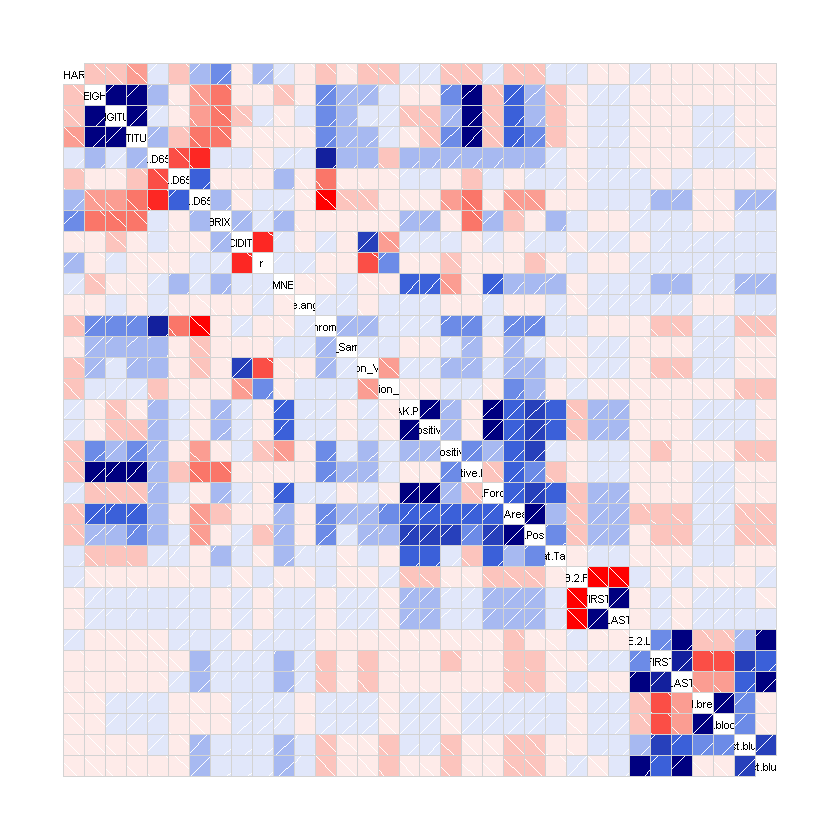

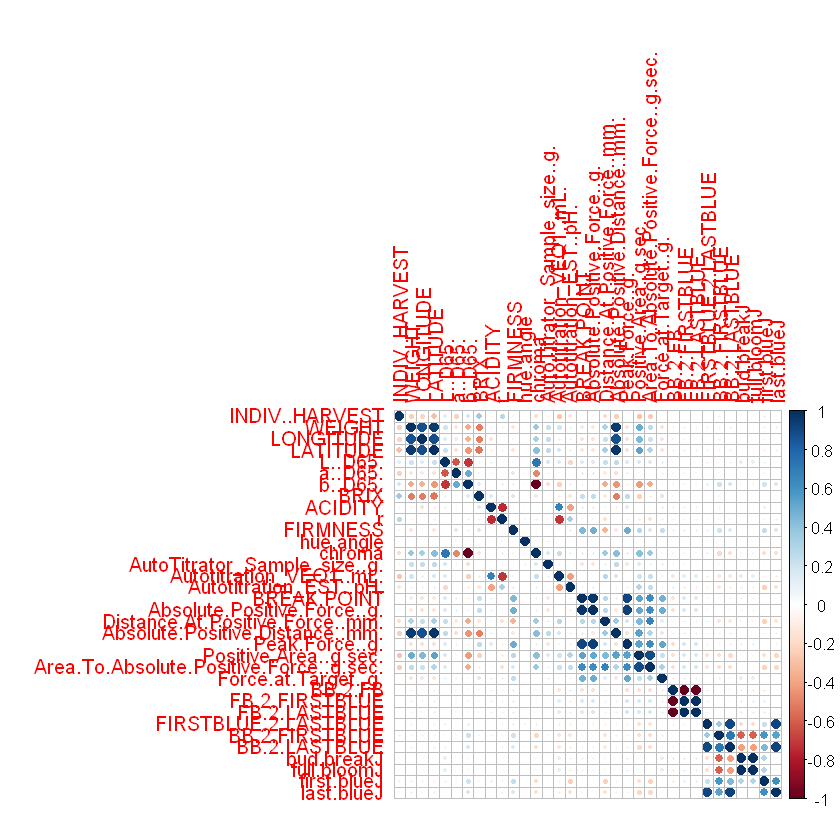

In [244]:
#correlation plot
corrplot(corrgram(BBcor_SH), method="circle")

# What's that?! MISSING DATA?!

In [245]:
#find out which columns hjave NA's
names(which(sapply(BBavg_SH, anyNA)))

[1] "WEIGHT"                                 
 [2] "LONGITUDE"                              
 [3] "LATITUDE"                               
 [4] "L..D65."                                
 [5] "a..D65."                                
 [6] "b..D65."                                
 [7] "r"                                      
 [8] "FIRMNESS"                               
 [9] "hue.angle"                              
[10] "Autotitration_VEQ1..mL."                
[11] "Autotitration_EST..pH."                 
[12] "BREAK.POINT"                            
[13] "Absolute.Positive.Force..g."            
[14] "Distance.At.Positive.Force..mm."        
[15] "Absolute.Positive.Distance..mm."        
[16] "Peak.Force..g."                         
[17] "Positive.Area..g.sec."                  
[18] "Area.To.Absolute.Positive.Force..g.sec."
[19] "Force.at.Target..g."                    
[20] "BB.2.FB"                                
[21] "FB.2.FIRSTBLUE"                         
[22] "FB.2.LASTBLUE"                          
[23] "FIRSTBLUE.2.LASTBLUE"                   
[24] "BB.2.FIRSTBLUE"                         
[25] "BB.2.LASTBLUE"                          
[26] "bud.breakJ"                             
[27] "full.bloomJ"                            
[28] "first.blueJ"                            
[29] "last.blueJ"

In [246]:
#findout what the ID is for those with NA's in weight
BBavg_SH[is.na(BBavg_SH$WEIGHT),]

,sample.indiv_har,INDIV..HARVEST,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,ACIDITY,...,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ,REAL_NAME,FM_PARENT,M_PARENT
333,134D-1,1,NaN,NaN,NaN,29.945,-0.3900000,-5.185000,74.5,69,...,33,69,102,60,60,129,162,NC3577-2,NCSF-12-L,ECHOTA
334,134D-1,1,NaN,NaN,NaN,29.945,-0.3900000,-5.185000,74.5,69,...,33,69,102,60,60,129,162,NC3577-3,NCSF-12-L,ECHOTA
478,16-2,2,NaN,NaN,NaN,29.130,-0.4966667,-5.136667,1.0,1,...,15,69,84,60,60,129,144,NC4011-1,Chanticleer,NC 2874
479,16-2,2,NaN,NaN,NaN,29.130,-0.4966667,-5.136667,1.0,1,...,15,69,84,60,60,129,144,NC4011-2,Chanticleer,NC 2874
480,16-2,2,NaN,NaN,NaN,29.130,-0.4966667,-5.136667,1.0,1,...,15,69,84,60,60,129,144,NC4011-3,Chanticleer,NC 2874


In [247]:
#Turns out, these are problem children who should have been removed. Let's do that 
BBavg_SH<-BBavg_SH[-c(333,334,478,479,480),]

In [248]:
#see how many problems this fixed...a lot, but still more left
names(which(sapply(BBavg_SH, anyNA)))

[1] "L..D65."              "a..D65."              "b..D65."             
 [4] "hue.angle"            "BREAK.POINT"          "BB.2.FB"             
 [7] "FB.2.FIRSTBLUE"       "FB.2.LASTBLUE"        "FIRSTBLUE.2.LASTBLUE"
[10] "BB.2.FIRSTBLUE"       "BB.2.LASTBLUE"        "bud.breakJ"          
[13] "full.bloomJ"          "first.blueJ"          "last.blueJ"

# MUTATE REPLACEMENT OF MISSING VALUES

## In this protion I am mutating and replacing the missing values with the harvest average in each column

In [249]:
#replace the missing values with the column mean removing the NA's by the individual harvest 
mod_SH<-BBavg_SH %>% 
  group_by(INDIV..HARVEST) %>% 
  mutate(L..D65. = ifelse(is.na(L..D65.), mean(L..D65., na.rm = TRUE), L..D65.),
         a..D65. = ifelse(is.na(a..D65.), mean(a..D65., na.rm = TRUE), a..D65.),
         b..D65. = ifelse(is.na(b..D65.), mean(b..D65., na.rm = TRUE), b..D65.),
         hue.angle = ifelse(is.na(hue.angle), mean(hue.angle, na.rm = TRUE), hue.angle),
         BREAK.POINT = ifelse(is.na(BREAK.POINT), mean(BREAK.POINT, na.rm = TRUE), BREAK.POINT),
         BB.2.FB = ifelse(is.na(BB.2.FB), mean(BB.2.FB, na.rm = TRUE), BB.2.FB),
         FB.2.FIRSTBLUE = ifelse(is.na(FB.2.FIRSTBLUE), mean(FB.2.FIRSTBLUE, na.rm = TRUE), FB.2.FIRSTBLUE),
         FB.2.LASTBLUE = ifelse(is.na(FB.2.LASTBLUE), mean(FB.2.LASTBLUE, na.rm = TRUE), FB.2.LASTBLUE),
         FIRSTBLUE.2.LASTBLUE = ifelse(is.na(FIRSTBLUE.2.LASTBLUE), mean(FIRSTBLUE.2.LASTBLUE, na.rm = TRUE), FIRSTBLUE.2.LASTBLUE),
         BB.2.FIRSTBLUE = ifelse(is.na(BB.2.FIRSTBLUE), mean(BB.2.FIRSTBLUE, na.rm = TRUE), BB.2.FIRSTBLUE),
         BB.2.LASTBLUE = ifelse(is.na(BB.2.LASTBLUE), mean(BB.2.LASTBLUE, na.rm = TRUE), BB.2.LASTBLUE),
         bud.breakJ = ifelse(is.na(bud.breakJ), mean(bud.breakJ, na.rm = TRUE), bud.breakJ),
         full.bloomJ = ifelse(is.na(full.bloomJ), mean(full.bloomJ, na.rm = TRUE), full.bloomJ),
         first.blueJ = ifelse(is.na(first.blueJ), mean(first.blueJ, na.rm = TRUE), first.blueJ),
         last.blueJ = ifelse(is.na(last.blueJ), mean(last.blueJ, na.rm = TRUE), last.blueJ)
        )

In [250]:
#check for NA's
names(which(sapply(mod_SH, anyNA)))

character(0)

In [251]:
#creating a correlation table which rounds to 3 decimal places

round(cor(mod_SH[, 2:30], use="pair"),3)


,INDIV..HARVEST,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,ACIDITY,r,...,Absolute.Positive.Distance..mm.,Peak.Force..g.,Positive.Area..g.sec.,Area.To.Absolute.Positive.Force..g.sec.,Force.at.Target..g.,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE
INDIV..HARVEST,1.000,-0.249,-0.217,-0.290,0.132,-0.238,0.181,0.361,-0.061,0.281,...,-0.244,0.007,-0.285,-0.250,0.000,0.019,-0.019,-0.019,0.007,-0.076
WEIGHT,-0.249,1.000,0.871,0.955,0.202,-0.140,-0.388,-0.519,-0.075,-0.088,...,0.959,-0.158,0.499,0.264,-0.158,-0.070,0.070,0.070,-0.077,-0.067
LONGITUDE,-0.217,0.871,1.000,0.887,0.141,-0.125,-0.354,-0.517,-0.169,0.006,...,0.878,-0.169,0.441,0.212,-0.149,-0.058,0.058,0.058,-0.005,-0.078
LATITUDE,-0.290,0.955,0.887,1.000,0.218,-0.150,-0.439,-0.535,-0.102,-0.074,...,0.971,-0.166,0.531,0.293,-0.147,-0.080,0.080,0.079,-0.075,-0.066
L..D65.,0.132,0.202,0.141,0.218,1.000,-0.629,-0.717,0.072,0.090,-0.004,...,0.252,0.160,0.179,0.151,0.093,-0.011,0.011,0.010,-0.081,-0.038
a..D65.,-0.238,-0.140,-0.125,-0.150,-0.629,1.000,0.501,-0.059,-0.042,-0.018,...,-0.188,0.082,-0.034,0.005,0.068,-0.052,0.052,0.052,0.026,-0.037
b..D65.,0.181,-0.388,-0.354,-0.439,-0.717,0.501,1.000,0.147,-0.030,0.097,...,-0.445,-0.097,-0.426,-0.376,-0.034,-0.052,0.053,0.053,0.111,0.211
BRIX,0.361,-0.519,-0.517,-0.535,0.072,-0.059,0.147,1.000,0.147,0.081,...,-0.502,0.263,-0.234,-0.112,0.175,0.043,-0.043,-0.043,-0.008,0.054
ACIDITY,-0.061,-0.075,-0.169,-0.102,0.090,-0.042,-0.030,0.147,1.000,-0.750,...,-0.102,0.137,-0.016,0.044,0.097,-0.079,0.079,0.079,-0.012,0.070
r,0.281,-0.088,0.006,-0.074,-0.004,-0.018,0.097,0.081,-0.750,1.000,...,-0.048,-0.088,-0.111,-0.165,-0.090,0.067,-0.067,-0.067,0.045,0.039


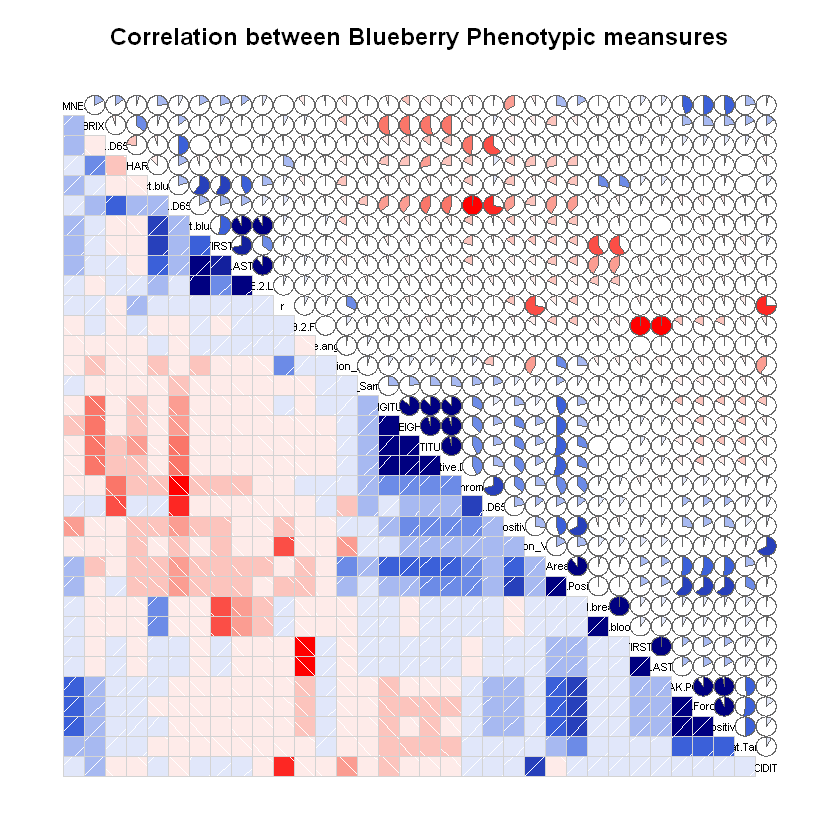

In [252]:
#correlations up and down with pie charts
corrgram(mod_SH, order=TRUE, 
         main = "Correlation between Blueberry Phenotypic meansures",
         lower.panel=panel.shade, 
         upper.panel=panel.pie,
         text.panel=panel.txt)

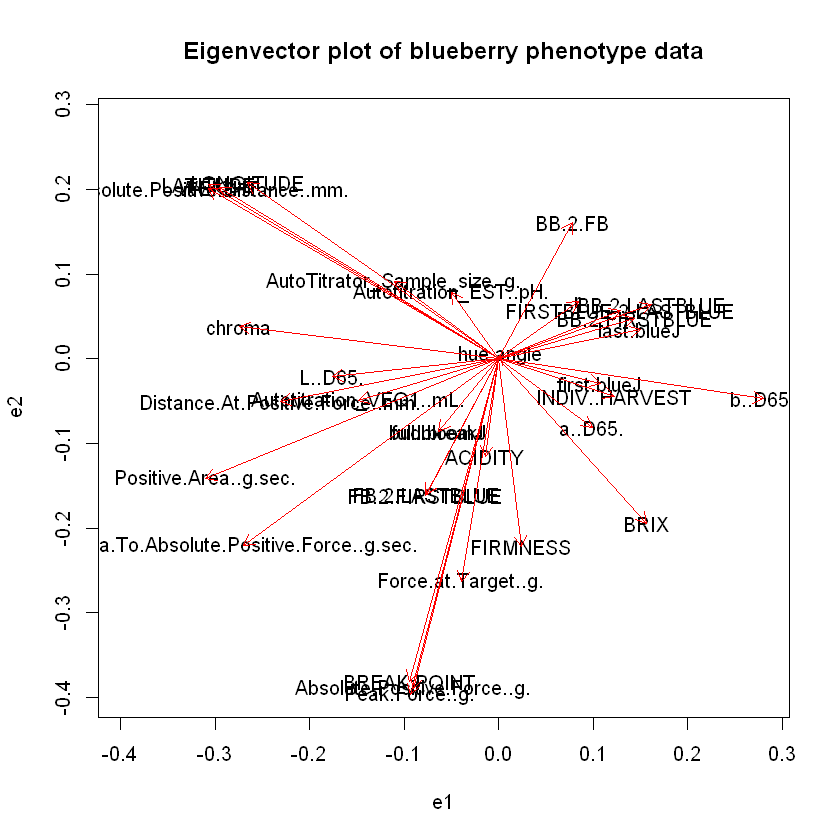

In [253]:
#eigenvector plots to show where phenotypica traits are in comparison to each other

SH_cor <- cor(mod_SH[,num.cols_SH], use='pair')
SH_eig <- eigen(SH_cor)$vectors[,1:2]
e1 <- SH_eig[,1]
e2 <- SH_eig[,2]
plot(e1,e2,col='white', xlim=range(e1,e2), ylim=range(e1,e2))
text(e1,e2, rownames(SH_cor), cex=1)
title("Eigenvector plot of blueberry phenotype data")
arrows(0, 0, e1, e2, cex=0.5, col="red", length=0.1)

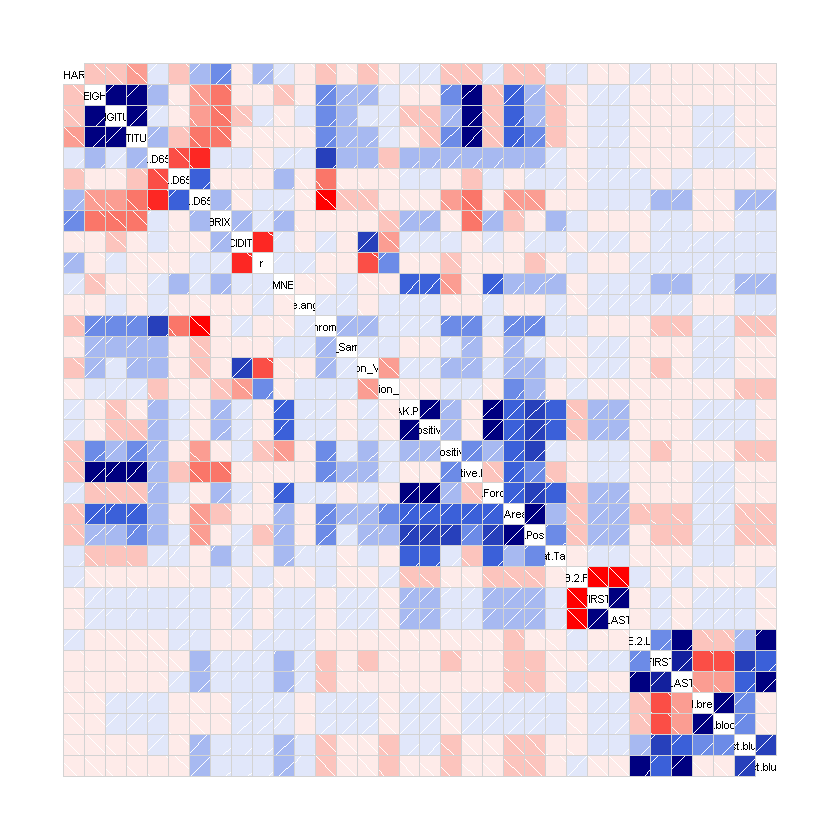

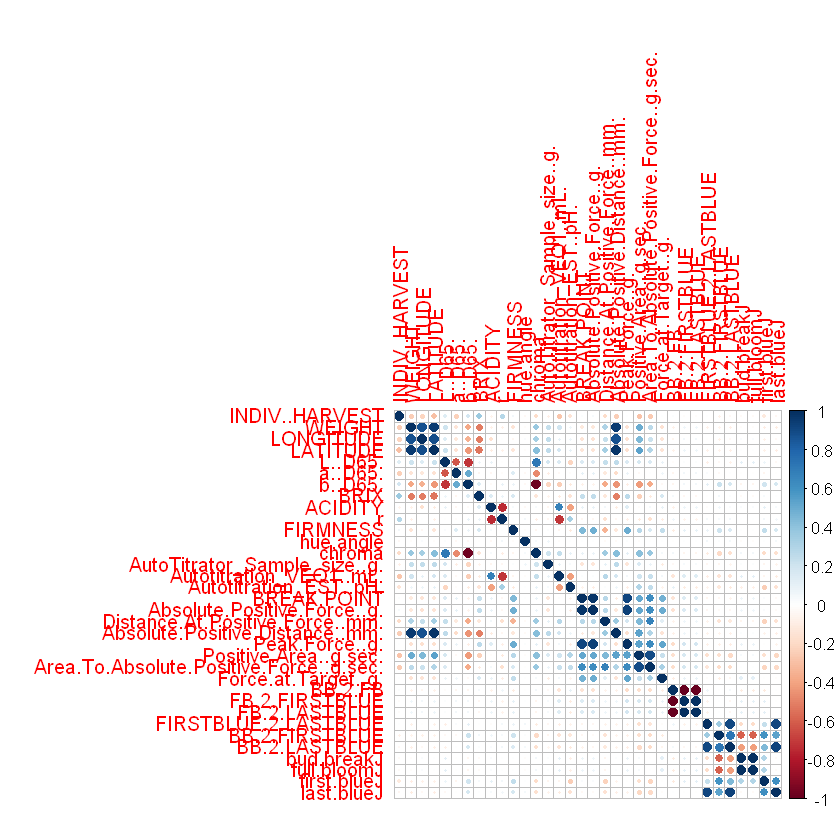

In [254]:
#more correplation plots. one is circular format

corrplot(corrgram(mod_SH), method="circle")

# MACHINE LEARNING FOR REPLACEMENT

## In this protion I am using the missing values as a test group for machine learning for replacement

In [255]:
install.packages('caTools')
library(caTools)
set.seed(101) 


Installing package into 'C:/Users/Lauren Redpath/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Lauren Redpath\Documents\R\win-library\3.6\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\Lauren Redpath\Documents\R\win-library\3.6\caTools\libs\x64\caTools.dll: Permission denied"Warning message:
"restored 'caTools'"


The downloaded binary packages are in
	C:\Users\Lauren Redpath\AppData\Local\Temp\RtmpEvhW93\downloaded_packages


In [267]:
#since there are significant differences between locations we will look at these locaitons separately, two new dataframes for each location are create
BBdiversity_CV <- BBdiversity[which(BBdiversity$LOCATION == 1),]
BBdiversity_SH <- BBdiversity[which(BBdiversity$LOCATION == 2),]
#drop location from dataframes
BBdiversity_CV<-subset(BBdiversity_CV, select = -c(LOCATION))
BBdiversity_SH<-subset(BBdiversity_SH, select = -c(LOCATION))
#drop 'problem children' where there are more NAs than data 
BBdiversity_SH<-BBdiversity_SH[-c(310, 315, 392, 397, 401),]
#remove nonnumeric columns
BBdiversity_CV1<-subset(BBdiversity_CV, select = -c(sample.indiv_har, REAL_NAME, SAMPLE_ID.REP.HARVEST, sample_id, rep, id.rep, FM_PARENT, M_PARENT, DATE, SEASON.HARVEST, INDIV..HARVEST, bud.break, full.bloom, last.blue, first.blue))
BBdiversity_SH1<-subset(BBdiversity_SH, select = -c(sample.indiv_har, REAL_NAME, SAMPLE_ID.REP.HARVEST, sample_id, rep, id.rep, FM_PARENT, M_PARENT, DATE, SEASON.HARVEST, INDIV..HARVEST, bud.break, full.bloom, last.blue, first.blue))

str(BBdiversity_SH)

'data.frame':	1260 obs. of  48 variables:
 $ REAL_NAME                              : Factor w/ 540 levels "#N/A","ARLEN-1",..: 2 2 2 3 3 3 4 4 4 11 ...
 $ SAMPLE_ID.REP.HARVEST                  : Factor w/ 1525 levels "1-1-5","1-1-6",..: 1121 1120 1122 1123 1124 1125 1126 1128 1127 787 ...
 $ sample_id                              : Factor w/ 225 levels "1","10","100",..: 135 135 135 135 135 135 135 135 135 94 ...
 $ rep                                    : num  1 1 1 2 2 2 3 3 3 1 ...
 $ sample.indiv_har                       : Factor w/ 619 levels "1-1","1-2","1-3",..: 422 421 423 421 422 423 421 423 422 299 ...
 $ id.rep                                 : Factor w/ 554 levels "1-1","10-1","10-2",..: 373 373 373 374 374 374 375 375 375 253 ...
 $ FM_PARENT                              : Factor w/ 156 levels "#N/A","0","290-1",..: 41 41 41 41 41 41 41 41 41 7 ...
 $ M_PARENT                               : Factor w/ 147 levels " Avonblue"," Carteret",..: 50 50 50 50 50 50 50 50 50 31 

In [270]:
#filter out and rows of traits which have NA

SH_na <- BBdiversity_SH1 %>% filter_all(any_vars(is.na(.)))
str(SH_na)

'data.frame':	158 obs. of  33 variables:
 $ WEIGHT                                 : num  0.0973 0.8914 1.3542 1.4758 1.3591 ...
 $ LONGITUDE                              : num  4.45 9.76 11.84 12.59 12.05 ...
 $ LATITUDE                               : num  5.33 12.09 13.77 14.07 13.69 ...
 $ L..D65.                                : num  26.4 21.5 28.7 27.7 25.6 ...
 $ a..D65.                                : num  -0.26 0.82 -0.47 -0.2 -0.27 -0.66 -0.7 -0.77 -0.62 -0.66 ...
 $ b..D65.                                : num  -2.86 -2.78 -5.93 -5.44 -4.87 -5.65 -5.09 -4.64 -4.8 -4.79 ...
 $ BRIX                                   : num  15 16 24 29 36 5 10 60 27 24 ...
 $ ACIDITY                                : num  16 41 61 55 52 39 55 26 44 33 ...
 $ r                                      : num  48.7 23.5 17.8 20.3 22.5 ...
 $ FIRMNESS                               : num  176 168 175 168 163 ...
 $ hue.angle                              : num  -0.00443 -3.93847 19.72619 -0.54172 -0.9471

In [273]:
#create a new dataframe for a population which does not have any NA values

SH_narm<-BBdiversity_SH1 %>% drop_na()
str(SH_narm)

'data.frame':	1102 obs. of  33 variables:
 $ WEIGHT                                 : num  2.07 1.92 1.78 2.04 2.36 ...
 $ LONGITUDE                              : num  12.3 11.2 10.8 11.1 12.2 ...
 $ LATITUDE                               : num  15.9 15.4 15.2 15.6 17.3 ...
 $ L..D65.                                : num  33 33.3 30.6 32.8 32.4 ...
 $ a..D65.                                : num  -0.64 -0.77 -0.59 -0.72 -0.64 -0.84 -0.54 -0.53 -0.73 -0.16 ...
 $ b..D65.                                : num  -4.21 -4.46 -4.57 -4.51 -3.65 -4.84 -4.33 -4.42 -3.75 -2.44 ...
 $ BRIX                                   : num  13 18 16 24 17 35 17 32 18 56 ...
 $ ACIDITY                                : num  7 92 18 186 25 35 187 41 33 17 ...
 $ r                                      : num  78.57 11.62 45.2 3.13 35.62 ...
 $ FIRMNESS                               : num  171 187 165 201 174 ...
 $ hue.angle                              : num  3.292 -1.87 0.109 -51.817 -1.526 ...
 $ chroma      

In [274]:
#double check for non-existance of NAs

any(is.na(SH_narm))

[1] FALSE

In [275]:
#create sample and training popilations

sample <- sample.split(SH_narm$WEIGHT, SplitRatio = 0.70)
train = subset(SH_narm, sample == TRUE)
test = subset(SH_narm, sample == FALSE)

In [276]:
#get the column names from the SH_na dataframe which have NAs for ease of generating models

names(which(sapply(BBdiversity_SH1, anyNA)))

[1] "WEIGHT"                                 
 [2] "LONGITUDE"                              
 [3] "LATITUDE"                               
 [4] "L..D65."                                
 [5] "a..D65."                                
 [6] "b..D65."                                
 [7] "r"                                      
 [8] "FIRMNESS"                               
 [9] "hue.angle"                              
[10] "Autotitration_VEQ1..mL."                
[11] "Autotitration_EST..pH."                 
[12] "BREAK.POINT"                            
[13] "Absolute.Positive.Force..g."            
[14] "Distance.At.Positive.Force..mm."        
[15] "Absolute.Positive.Distance..mm."        
[16] "Peak.Force..g."                         
[17] "Positive.Area..g.sec."                  
[18] "Area.To.Absolute.Positive.Force..g.sec."
[19] "Force.at.Target..g."                    
[20] "BB.2.FB"                                
[21] "FB.2.FIRSTBLUE"                         
[22] "FB.2.LASTBLUE"                          
[23] "FIRSTBLUE.2.LASTBLUE"                   
[24] "BB.2.FIRSTBLUE"                         
[25] "BB.2.LASTBLUE"                          
[26] "bud.breakJ"                             
[27] "full.bloomJ"                            
[28] "first.blueJ"                            
[29] "last.blueJ"

In [277]:
#Create models for the columns specified to havs NAs in at least one row + check a random model
model2 <- lm(LONGITUDE ~ .,train)
model3 <- lm(LATITUDE ~ .,train)
model4 <- lm(L..D65. ~ .,train)
model5 <- lm(a..D65. ~ .,train)
model6 <- lm(b..D65. ~ .,train)
model7 <- lm(r ~ .,train)
model8 <- lm(FIRMNESS ~ .,train)
model9 <- lm(hue.angle ~ .,train)
model10 <- lm(Autotitration_VEQ1..mL. ~ .,train)
model11 <- lm(Autotitration_EST..pH. ~ .,train)
model12 <- lm(BREAK.POINT ~ .,train)
model13 <- lm(Absolute.Positive.Force..g. ~ .,train)
model14 <- lm(Distance.At.Positive.Force..mm. ~ .,train)
model15 <- lm(Absolute.Positive.Distance..mm. ~ .,train)
model16 <- lm(Peak.Force..g. ~ .,train)
model17 <- lm(Positive.Area..g.sec. ~ .,train)
model18 <- lm(Area.To.Absolute.Positive.Force..g.sec. ~ .,train)
model19 <- lm(Force.at.Target..g. ~ .,train)
model20 <- lm(BB.2.FB ~ .,train)
model21 <- lm(FB.2.FIRSTBLUE ~ .,train)
model22 <- lm(FB.2.LASTBLUE ~ .,train)
model23 <- lm(FIRSTBLUE.2.LASTBLUE ~ .,train)
model24 <- lm(BB.2.FIRSTBLUE ~ .,train)
model25 <- lm(BB.2.LASTBLUE ~ .,train)
model26 <- lm(bud.breakJ ~ .,train)
model27 <- lm(full.bloomJ ~ .,train)
model28 <- lm(first.blueJ ~ .,train)
model29 <- lm(last.blueJ ~ .,train)
summary(model2)


Call:
lm(formula = LONGITUDE ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39425 -0.44033 -0.04118  0.41868  3.04193 

Coefficients: (6 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              4.8153931  0.8843950   5.445 7.05e-08
WEIGHT                                   0.6019710  0.1918810   3.137 0.001773
LATITUDE                                 0.3405811  0.0410018   8.306 4.65e-16
L..D65.                                 -0.0603680  0.0145116  -4.160 3.55e-05
a..D65.                                 -0.3583511  0.1066873  -3.359 0.000822
b..D65.                                 -0.2243230  0.1117543  -2.007 0.045080
BRIX                                    -0.0027719  0.0012214  -2.269 0.023530
ACIDITY                                 -0.0009283  0.0010246  -0.906 0.365226
r                                        0.0024470  0.0014639   1.672 0.095022
F

In [278]:
#make predictions based on models
LONGITUDE.pred <- predict(model2,test)
LATITUDE.pred <- predict(model3,test)
L..D65..pred <- predict(model4,test)
a..D65..pred <- predict(model5,test)
b..D65..pred <- predict(model6,test)
r.pred <- predict(model7,test)
FIRMNESS.pred <- predict(model8,test)
hue.angle.pred <- predict(model9,test)
Autotitration_VEQ1..mL..pred <- predict(model10,test)
Autotitration_EST..pH..pred <- predict(model11,test)
BREAK.POINT.pred <- predict(model12,test)
Absolute.Positive.Force..g..pred <- predict(model13,test)
Distance.At.Positive.Force..mm..pred <- predict(model14,test)
Absolute.Positive.Distance..mm..pred <- predict(model15,test)
Peak.Force..g..pred <- predict(model16,test)
Positive.Area..g.sec..pred <- predict(model17,test)
Area.To.Absolute.Positive.Force..g.sec..pred <- predict(model18,test)
Force.at.Target..g..pred <- predict(model19,test)
BB.2.FB.pred <- predict(model20,test)
FB.2.FIRSTBLUE.pred <- predict(model21,test)
FB.2.LASTBLUE.pred <- predict(model22,test)
FIRSTBLUE.2.LASTBLUE.pred <- predict(model23,test)
BB.2.FIRSTBLUE.pred <- predict(model24,test)
BB.2.LASTBLUE.pred <- predict(model25,test)
bud.breakJ.pred <- predict(model26,test)
full.bloomJ.pred <- predict(model27,test)
first.blueJ.pred <- predict(model28,test)
last.blueJ.pred <- predict(model29,test)

Warning message in predict.lm(model2, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model3, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model4, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model5, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model6, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model7, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model8, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model9, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model10, test):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model11, test):
"prediction from a rank-deficient fit may be

In [280]:
#let's check a few predictions and see how close it was

results <- cbind(LONGITUDE.pred, test$LONGITUDE, FIRMNESS.pred, test$FIRMNESS, BREAK.POINT.pred, test$BREAK.POINT, BB.2.LASTBLUE.pred, test$BB.2.LASTBLUE) 
colnames(results) <- c('pred-LONGITUDE', 'real-LONGITUDE','pred-FIRMNESS','real-FIRMNESS', 'pred-BREAK','real-BREAK', 'pred-BB2LB','real-BB2LB')
results <- as.data.frame(results)
head(results, 20)

,pred-LONGITUDE,real-LONGITUDE,pred-FIRMNESS,real-FIRMNESS,pred-BREAK,real-BREAK,pred-BB2LB,real-BB2LB
9,11.786715,10.799,177.7965,165.3813,307.7139,308.046,123,123
29,5.957394,5.950,179.0996,141.3550,432.2299,432.325,115,115
30,6.755476,5.852,183.3314,146.1238,470.9130,471.366,115,115
31,6.190198,5.942,175.5483,137.3857,441.3285,441.283,115,115
32,7.234635,6.678,165.2982,140.2110,355.0954,350.438,115,115
36,5.933437,6.257,176.4187,130.7295,450.3621,448.234,102,102
41,7.791513,7.980,177.5575,172.7261,300.8524,301.386,137,137
42,8.194986,9.236,105.7355,185.2507,348.0309,356.168,137,137
45,7.011092,6.963,206.1874,204.6107,423.3724,423.087,137,137
46,7.249156,7.222,207.7783,187.3133,474.0349,473.808,137,137


In [282]:
#make predictions based on models
BBdiversity_SH$LONGITUDE.pred <- predict(model2,BBdiversity_SH)
BBdiversity_SH$LATITUDE.pred <- predict(model3,BBdiversity_SH)
BBdiversity_SH$L..D65..pred <- predict(model4,BBdiversity_SH)
BBdiversity_SH$a..D65..pred <- predict(model5,BBdiversity_SH)
BBdiversity_SH$b..D65..pred <- predict(model6,BBdiversity_SH)
BBdiversity_SH$r.pred <- predict(model7,BBdiversity_SH)
BBdiversity_SH$FIRMNESS.pred <- predict(model8,BBdiversity_SH)
BBdiversity_SH$hue.angle.pred <- predict(model9,BBdiversity_SH)
BBdiversity_SH$Autotitration_VEQ1..mL..pred <- predict(model10,BBdiversity_SH)
BBdiversity_SH$Autotitration_EST..pH..pred <- predict(model11,BBdiversity_SH)
BBdiversity_SH$BREAK.POINT.pred <- predict(model12,BBdiversity_SH)
BBdiversity_SH$Absolute.Positive.Force..g..pred <- predict(model13,BBdiversity_SH)
BBdiversity_SH$Distance.At.Positive.Force..mm..pred <- predict(model14,BBdiversity_SH)
BBdiversity_SH$Absolute.Positive.Distance..mm..pred <- predict(model15,BBdiversity_SH)
BBdiversity_SH$Peak.Force..g..pred <- predict(model16,BBdiversity_SH)
BBdiversity_SH$Positive.Area..g.sec..pred <- predict(model17,BBdiversity_SH)
BBdiversity_SH$Area.To.Absolute.Positive.Force..g.sec..pred <- predict(model18,BBdiversity_SH)
BBdiversity_SH$Force.at.Target..g..pred <- predict(model19,BBdiversity_SH)
BBdiversity_SH$BB.2.FB.pred <- predict(model20,BBdiversity_SH)
BBdiversity_SH$FB.2.FIRSTBLUE.pred <- predict(model21,BBdiversity_SH)
BBdiversity_SH$FB.2.LASTBLUE.pred <- predict(model22,BBdiversity_SH)
BBdiversity_SH$FIRSTBLUE.2.LASTBLUE.pred <- predict(model23,BBdiversity_SH)
BBdiversity_SH$BB.2.FIRSTBLUE.pred <- predict(model24,BBdiversity_SH)
BBdiversity_SH$BB.2.LASTBLUE.pred <- predict(model25,BBdiversity_SH)
BBdiversity_SH$bud.breakJ.pred <- predict(model26,BBdiversity_SH)
BBdiversity_SH$full.bloomJ.pred <- predict(model27,BBdiversity_SH)
BBdiversity_SH$first.blueJ.pred <- predict(model28,BBdiversity_SH)
BBdiversity_SH$last.blueJ.pred <- predict(model29,BBdiversity_SH)

Warning message in predict.lm(model2, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model3, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model4, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model5, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model6, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model7, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model8, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model9, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(model10, BBdiversity_SH):
"prediction from a rank-deficient fit may be misleading"

In [283]:
#check structure to make sure hat the predictions were added
str(BBdiversity_SH)

'data.frame':	1260 obs. of  76 variables:
 $ REAL_NAME                                   : Factor w/ 540 levels "#N/A","ARLEN-1",..: 2 2 2 3 3 3 4 4 4 11 ...
 $ SAMPLE_ID.REP.HARVEST                       : Factor w/ 1525 levels "1-1-5","1-1-6",..: 1121 1120 1122 1123 1124 1125 1126 1128 1127 787 ...
 $ sample_id                                   : Factor w/ 225 levels "1","10","100",..: 135 135 135 135 135 135 135 135 135 94 ...
 $ rep                                         : num  1 1 1 2 2 2 3 3 3 1 ...
 $ sample.indiv_har                            : Factor w/ 619 levels "1-1","1-2","1-3",..: 422 421 423 421 422 423 421 423 422 299 ...
 $ id.rep                                      : Factor w/ 554 levels "1-1","10-1","10-2",..: 373 373 373 374 374 374 375 375 375 253 ...
 $ FM_PARENT                                   : Factor w/ 156 levels "#N/A","0","290-1",..: 41 41 41 41 41 41 41 41 41 7 ...
 $ M_PARENT                                    : Factor w/ 147 levels " Avonblue"," Cart

In [284]:
#create an impute function for LONGITUDE which will replace NA values with the predictions
impute_LONGITUDE <- function(LONGITUDE,LONGITUDE.pred){
    out <- LONGITUDE
    for (i in 1:length(LONGITUDE)){
        
        if (is.na(LONGITUDE[i])){
            out[i] <- LONGITUDE.pred
            }
    }
    return(out)
}

In [285]:
#run the function on the dataset (note selected dataset is not the dataset with only numeric values)
BBdiversity_SH$LONGITUDE <- impute_LONGITUDE(BBdiversity_SH$LONGITUDE,BBdiversity_SH$LONGITUDE.pred)

Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"Warning message in out[i] <- LONGITUDE.pred:
"number of items to replace is not a multiple of replacement length"

In [286]:
#check for any NA values in imputed column
any(is.na(BBdiversity_SH$LONGITUDE))

[1] FALSE

In [287]:
#check for missing NA's in dataset that initially had them
any(is.na(BBdiversity_SH1$LONGITUDE))

[1] TRUE

In [292]:
#check the column numbers in initial dataset
BBdiversity_SH1[is.na(BBdiversity_SH1$LONGITUDE),]

,WEIGHT,LONGITUDE,LATITUDE,L..D65.,a..D65.,b..D65.,BRIX,ACIDITY,r,FIRMNESS,...,BB.2.FB,FB.2.FIRSTBLUE,FB.2.LASTBLUE,FIRSTBLUE.2.LASTBLUE,BB.2.FIRSTBLUE,BB.2.LASTBLUE,bud.breakJ,full.bloomJ,first.blueJ,last.blueJ
465,NA,NA,NA,31.51,-0.35,-5.27,138,66,13.42466,NA,...,28,41,74,33,69,102,60,60,129,162
470,NA,NA,NA,28.38,-0.43,-5.10,11,72,13.67089,NA,...,28,41,74,33,69,102,60,60,129,162
544,NA,NA,NA,27.20,-0.49,-4.80,1,1,NA,NA,...,28,41,56,15,69,84,60,60,129,144
547,NA,NA,NA,31.32,-0.65,-5.75,1,1,NA,NA,...,28,41,56,15,69,84,60,60,129,144
553,NA,NA,NA,28.87,-0.35,-4.86,1,1,NA,NA,...,21,48,63,15,69,84,60,60,129,144
674,0.8232,NA,NA,29.66,-0.53,-3.51,137,39,21.08696,134.1027,...,28,49,87,38,77,115,60,60,137,175
1354,0.2647,NA,NA,22.93,0.15,-2.55,1,1,NA,168.4882,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [293]:
#check the imputed values using the provided column numbers in previous command
BBdiversity_SH[c(310:315,392:401, 522:525, 1187), c(1,3,5, 13,49)]

,REAL_NAME,sample_id,sample.indiv_har,LONGITUDE,LONGITUDE.pred
462,NC3530-3,10,10-3,6.94800,7.221869
463,NC3530-3,10,10-1,8.53500,8.717234
464,NC3530-3,10,10-2,7.34500,8.074484
465,NC3577-2,134D,134D-1,12.24856,NA
467,NC3577-2,134,134-2,10.63000,NA
468,NC3577-2,134,134-3,10.65600,9.887794
546,NC4011-1,16,16-3,8.53500,8.484195
547,NC4011-2,16,16-2,12.24856,NA
549,NC4011-2,16,16-3,8.84900,9.110016
550,NC4011-3,16,16-4,7.61800,7.879916


# Unnecessary simplistic pedigree

In [297]:
#make a new datafrom with just the real name, dam, and sire
ped<-subset(flowers2, select = -c(sample.indiv_har))
ped=ped %>% 
  rename(
    id = REAL_NAME,
    dam = FM_PARENT,
    sire = M_PARENT,  
    )

In [298]:
#install Pedantics for pedigree graphic
install.packages("pedantics")
library(pedantics)

Installing package into 'C:/Users/Lauren Redpath/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'pedantics' is not available (for R version 3.6.1)"

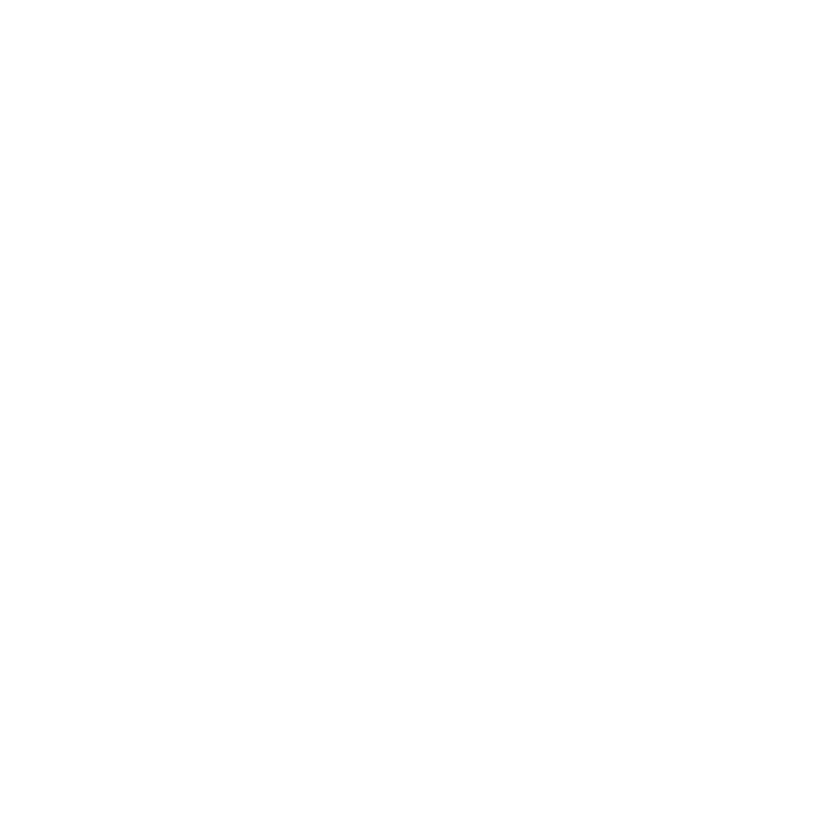

In [300]:
#display pedigree
drawPedigree(ped)

##### this was not possible without the great Anna Rogers